#                LetsGrowMore ( Data Science Internship )
#### Stock Market Prediction And Forecasting Using Stacked LSTM (Beginner Level Task)
## Yash Mathur
##### Dataset Link - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

#### Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset from the link 

In [2]:
url='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset=pd.read_csv(url,index_col=0)

In [3]:
dataset

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


#### Plotting the graph of open price

<AxesSubplot:xlabel='Date'>

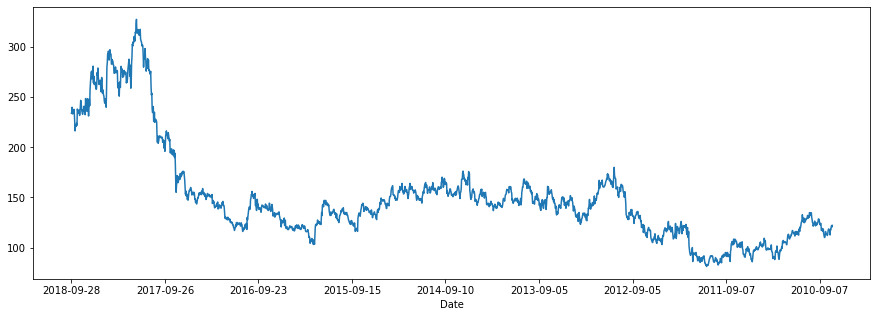

In [4]:
dataset['Open'].plot(figsize=(15,5))

In [5]:
dataset.shape

(2035, 7)

#### Seperating the data for training and testing purpose

In [6]:
dataset_training=dataset.iloc[:int(len(dataset)*0.75), ]
dataset_testing=dataset.iloc[int(len(dataset)*0.75):, ]

In [7]:
print('Training dataset shape',dataset_training.shape)
print('Testing dataset shape',dataset_testing.shape)

Training dataset shape (1526, 7)
Testing dataset shape (509, 7)


In [8]:
dataset_training

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2012-08-03,129.45,132.25,129.10,130.85,131.15,2754756,3612.75
2012-08-02,125.95,130.90,125.95,130.30,130.05,3704533,4800.89
2012-08-01,126.70,129.30,126.20,127.35,127.05,1645936,2105.27


In [9]:
dataset_testing

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2012-07-27,120.0,123.95,119.80,120.65,120.65,2010264,2453.32
2012-07-26,120.0,123.25,119.30,120.00,120.05,2495002,3012.91
2012-07-25,123.0,125.00,119.00,120.65,120.80,2974617,3618.35
2012-07-24,115.0,124.15,115.00,123.00,123.40,4358964,5276.56
2012-07-23,118.0,119.40,115.00,116.00,115.65,871954,1022.95
...,...,...,...,...,...,...,...
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31


In [10]:
training_set=dataset_training.iloc[:, 0:1].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [126.7 ],
       [120.  ],
       [121.  ]])

#### Scaling the data for the LSTM 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaled=scaler.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.58322207],
       [0.58544726],
       [0.60970182],
       ...,
       [0.10547397],
       [0.07565643],
       [0.08010681]])

### In LSTM ,we have to take inputs as timestamp and I am taking of 60.

In [13]:
x_train=[]
y_train=[]
for i in range(60,len(dataset_training)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
x_train,y_train=np.array(x_train),np.array(y_train)


#### Reshaping the data to feed into the LSTM model

In [14]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

### Now, I am importing all the necessary libraries for LSTM and fitting the data into the model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
regressor=Sequential([
    LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
23/23 [==============================] - 8s 112ms/step - loss: 0.0201
Epoch 2/100
23/23 [==============================] - 2s 107ms/step - loss: 0.0057
Epoch 3/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0055
Epoch 4/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0043
Epoch 5/100
23/23 [==============================] - 2s 99ms/step - loss: 0.0041
Epoch 6/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0044
Epoch 7/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0038
Epoch 8/100
23/23 [==============================] - 2s 98ms/step - loss: 0.0038
Epoch 9/100
23/23 [==============================] - 2s 96ms/step - loss: 0.0036
Epoch 10/100
23/23 [==============================] - 2s 98ms/step - loss: 0.0036: 0s - loss: 0.003
Epoch 11/100
23/23 [==============================] - 2s 98ms/step - loss: 0.0034
Epoch 12/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0033
E

23/23 [==============================] - 2s 98ms/step - loss: 0.0012


### Concating the dataset for making the x_test with timestamp as 60

In [16]:
dataset_total =pd.concat((dataset_training['Open'],dataset_testing['Open']),axis=0)

In [17]:
inputs=dataset_total[len(dataset_total)-len(dataset_testing)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

In [18]:
x_test=[]
for i in range(60,569):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)

#### Reshaping the x_test

In [19]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

#### Predicting with x_test

In [20]:
predicted_stock_price=regressor.predict(x_test)

#### Inversing the predicted values

In [21]:
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

In [22]:
dataset_testing['Predicted']=predicted_stock_price

In [23]:
final_visualization=pd.concat([dataset['Open'],dataset_testing['Open'],dataset_testing['Predicted']],axis=1)

### Visualizing the data with training,testing and predicted prices

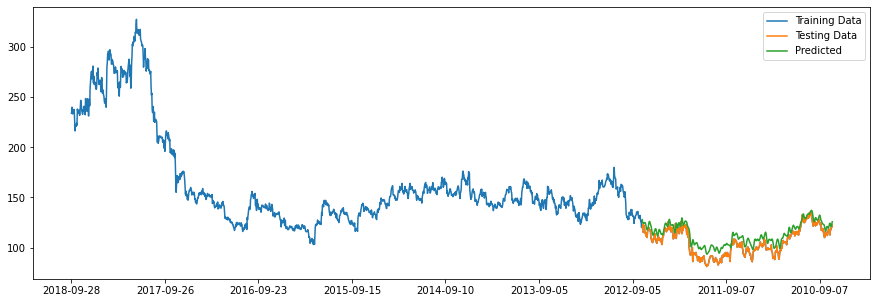

In [29]:
final_visualization.plot(figsize=(15,5))
final_visualization.columns=['Training Data','Testing Data','Predicted']

#### Visualizing the data with testing and predicted prices

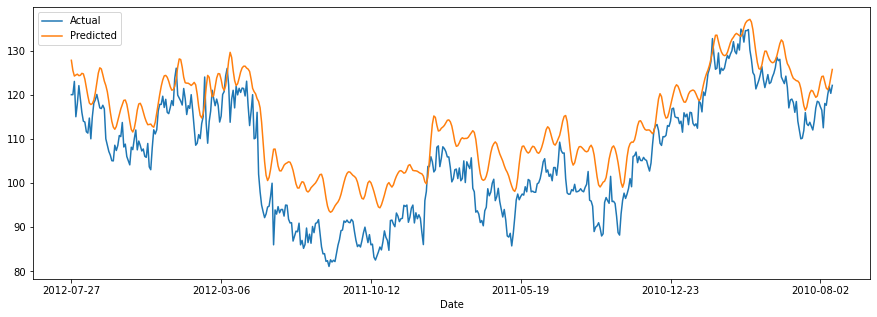

In [30]:
plt.figure(figsize=(15,5))
dataset_testing['Open'].plot(label='Actual')
dataset_testing['Predicted'].plot(label='Predicted')
plt.legend()

In [31]:
Actual=dataset_testing['Open']
Predicted=dataset_testing['Predicted']

In [32]:
Dataframe=pd.DataFrame({'Actual':Actual,'Predicted':Predicted})

#### Making the dataframe with actual as well as predicted 

In [33]:
Dataframe

,Actual,Predicted
Date,,
2012-07-27,120.0,127.777962
2012-07-26,120.0,125.485413
2012-07-25,123.0,124.209389
2012-07-24,115.0,124.454956
2012-07-23,118.0,124.642754
...,...,...
2010-07-27,117.6,121.508957
2010-07-26,120.1,121.113335
2010-07-23,121.8,122.022865


#### I have implemented this on Open Price , you can implement on any of the above columns.

# Thank You !